# Jupyter notebook sample

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5390 - loss: 0.9962 - val_accuracy: 0.6222 - val_loss: 0.9149
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6192 - loss: 0.9650 - val_accuracy: 0.6889 - val_loss: 0.9031
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6553 - loss: 0.9374 - val_accuracy: 0.7111 - val_loss: 0.8915
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6164 - loss: 0.9381 - val_accuracy: 0.7111 - val_loss: 0.8804
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6459 - loss: 0.9235 - val_accuracy: 0.7111 - val_loss: 0.8694
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6271 - loss: 0.9147 - val_accuracy: 0.7111 - val_loss: 0.8584
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6386 - loss: 0.8960 - val_accuracy: 0.7333 - val_loss: 0.8477
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6542 - loss: 0.8820 - val_accuracy: 0.7333 - val_loss: 0.8368

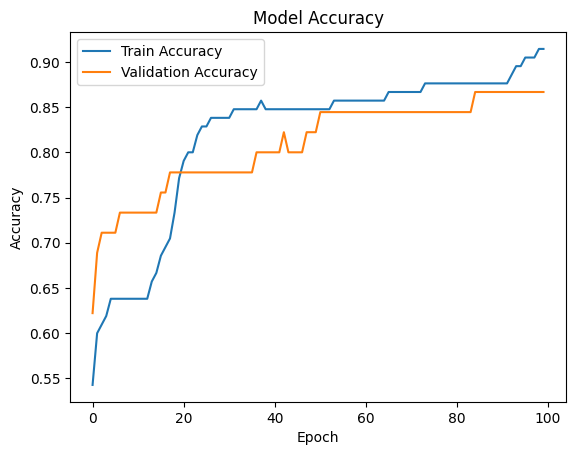

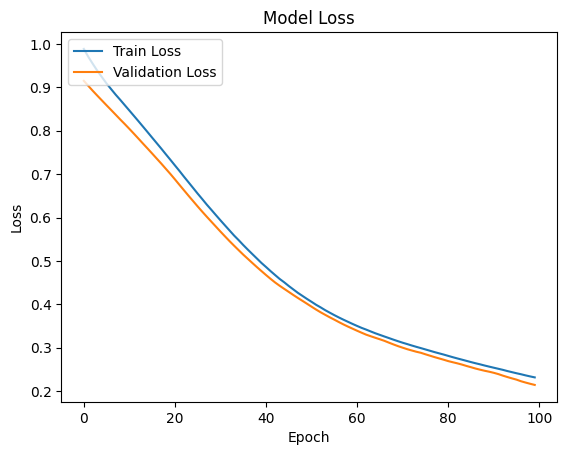

In [3]:
from keras.src.optimizers import Adam
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.datasets import load_iris

# Neural Network Class
class NeuralNet:
    def __init__(self):
        data = load_iris()
        self.features = data.data
        self.labels = data.target
        self.processed_data = None
        self.label_encoder = LabelEncoder()

    def preprocess(self):
        # Create DataFrame from the features
        feature_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
        self.raw_input = pd.DataFrame(self.features, columns=feature_columns)

        # Encode labels
        self.labels = self.label_encoder.fit_transform(self.labels)

        # Normalize features
        scaler = StandardScaler()
        features_scaled = scaler.fit_transform(self.raw_input)

        # Create processed data frame
        self.processed_data = pd.DataFrame(features_scaled, columns=feature_columns)
        self.processed_data['species'] = self.labels

    def build_model(self, input_dim):
        # Define model architecture
        model = Sequential([
            Dense(10, activation='relu'),
            Dense(8, activation='relu'),
            Dense(3, activation='softmax')  # Assuming 3 classes in the output
        ])
        model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

    def train_evaluate(self):
        # Prepare data
        X = self.processed_data.drop('species', axis=1).values
        y = self.processed_data['species'].values
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Build and train model
        model = self.build_model(X_train.shape[1])
        history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)

        # Visualization of training and validation metrics
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(loc='upper left')
        plt.show()

        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(loc='upper left')
        plt.show()

# Main execution logic
if __name__ == "__main__":
    nn = NeuralNet()
    nn.preprocess()
    nn.train_evaluate()


### Interactive tables

Effortlessly view, navigate, sort, and filter data. Create charts and access essential data insights, including descriptive statistics and missing values – all without writing a single line of code.

### Visualization in IDE

Create graphs and visualizations that match your chosen color scheme.